In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/corona-dataset/dataset/time_series_covid_19_confirmed.csv
/kaggle/input/corona-dataset/dataset/time_series_covid_19_recovered.csv
/kaggle/input/corona-dataset/dataset/recent_covid_19_data.csv
/kaggle/input/corona-dataset/dataset/time-series-19-covid-combined.csv
/kaggle/input/corona-dataset/dataset/per_day_cases.xlsx
/kaggle/input/corona-dataset/dataset/Indian Coordinates.xlsx
/kaggle/input/corona-dataset/dataset/Covid cases in India.xlsx
/kaggle/input/corona-dataset/dataset/COVID19_open_line_list.csv
/kaggle/input/corona-dataset/dataset/time_series_covid_19_deaths.csv
/kaggle/input/corona-dataset/dataset/covid_19_data.csv
/kaggle/input/corona-dataset/dataset/COVID19_line_list_data.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
import plotly
import plotly.express as px
import plotly.graph_objects as go
import cufflinks as cf
import plotly.offline as pyo
from plotly.offline import init_notebook_mode, plot, iplot
import folium
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
plt.rcParams['figure.figsize']=10,12

In [4]:
df = pd.read_excel("/kaggle/input/corona-dataset/dataset/Covid cases in India.xlsx")
df

,S. No.,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death
0,1,Andhra Pradesh,12,0,1,0
1,2,Chhattisgarh,6,0,0,0
2,3,Delhi,38,1,6,1
3,4,Gujarat,43,0,0,3
4,5,Haryana,16,14,11,0
5,6,Himachal Pradesh,4,0,0,1
6,7,Karnataka,20,0,3,2
7,8,Kerala,131,7,11,0
8,9,Madhya Pradesh,23,0,0,1
9,10,Maharashtra,144,3,15,4


In [5]:
df.columns

Index(['S. No.', 'Name of State / UT',
       'Total Confirmed cases (Indian National)',
       'Total Confirmed cases ( Foreign National )', 'Cured', 'Death'],
      dtype='object')

In [6]:
df.describe()

,S. No.,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death
count,26.000000,26.000000,26.000000,26.000000,26.000000
mean,13.500000,26.423077,1.615385,2.461538,0.653846
std,7.648529,35.586709,3.589729,4.420233,1.017539
min,1.000000,1.000000,0.000000,0.000000,0.000000
25%,7.250000,6.000000,0.000000,0.000000,0.000000
50%,13.500000,14.500000,0.000000,0.000000,0.000000
75%,19.750000,33.500000,1.000000,2.500000,1.000000
max,26.000000,144.000000,14.000000,15.000000,4.000000


In [7]:
df.isnull().sum()

S. No.                                        0
Name of State / UT                            0
Total Confirmed cases (Indian National)       0
Total Confirmed cases ( Foreign National )    0
Cured                                         0
Death                                         0
dtype: int64

In [8]:
df.drop(['S. No.'], axis=1, inplace=True)
df

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death
0,Andhra Pradesh,12,0,1,0
1,Chhattisgarh,6,0,0,0
2,Delhi,38,1,6,1
3,Gujarat,43,0,0,3
4,Haryana,16,14,11,0
5,Himachal Pradesh,4,0,0,1
6,Karnataka,20,0,3,2
7,Kerala,131,7,11,0
8,Madhya Pradesh,23,0,0,1
9,Maharashtra,144,3,15,4


In [9]:
df['Total Cases'] = df['Total Confirmed cases (Indian National)'] + df['Total Confirmed cases ( Foreign National )']
df

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total Cases
0,Andhra Pradesh,12,0,1,0,12
1,Chhattisgarh,6,0,0,0,6
2,Delhi,38,1,6,1,39
3,Gujarat,43,0,0,3,43
4,Haryana,16,14,11,0,30
5,Himachal Pradesh,4,0,0,1,4
6,Karnataka,20,0,3,2,20
7,Kerala,131,7,11,0,138
8,Madhya Pradesh,23,0,0,1,23
9,Maharashtra,144,3,15,4,147


In [10]:
total_cases_overall = df['Total Cases'].sum()
print("The Total cases in India till 27 March are",total_cases_overall)

The Total cases in India till 27 March are 729


In [11]:
df['Active Cases'] = df['Total Cases'] - (df['Cured']+df['Death'])
df

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total Cases,Active Cases
0,Andhra Pradesh,12,0,1,0,12,11
1,Chhattisgarh,6,0,0,0,6,6
2,Delhi,38,1,6,1,39,32
3,Gujarat,43,0,0,3,43,40
4,Haryana,16,14,11,0,30,19
5,Himachal Pradesh,4,0,0,1,4,3
6,Karnataka,20,0,3,2,20,15
7,Kerala,131,7,11,0,138,127
8,Madhya Pradesh,23,0,0,1,23,22
9,Maharashtra,144,3,15,4,147,128


In [12]:
total_active_overall = df['Active Cases'].sum()
print("Total Active Cases till 27 March are",total_active_overall)

Total Active Cases till 27 March are 648


In [13]:
df.style.background_gradient(cmap='Reds')

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total Cases,Active Cases
0,Andhra Pradesh,12,0,1,0,12,11
1,Chhattisgarh,6,0,0,0,6,6
2,Delhi,38,1,6,1,39,32
3,Gujarat,43,0,0,3,43,40
4,Haryana,16,14,11,0,30,19
5,Himachal Pradesh,4,0,0,1,4,3
6,Karnataka,20,0,3,2,20,15
7,Kerala,131,7,11,0,138,127
8,Madhya Pradesh,23,0,0,1,23,22
9,Maharashtra,144,3,15,4,147,128


In [14]:
total_active_cases = df.groupby("Name of State / UT")['Active Cases'].sum().sort_values(ascending=False).to_frame()
total_active_cases

,Active Cases
Name of State / UT,
Maharashtra,128
Kerala,127
Telengana,44
Rajasthan,40
Gujarat,40
Tamil Nadu,33
Uttar Pradesh,32
Delhi,32
Punjab,28


In [15]:
total_active_cases.style.background_gradient(cmap='Reds')

,Active Cases
Name of State / UT,
Maharashtra,128
Kerala,127
Telengana,44
Rajasthan,40
Gujarat,40
Tamil Nadu,33
Uttar Pradesh,32
Delhi,32
Punjab,28


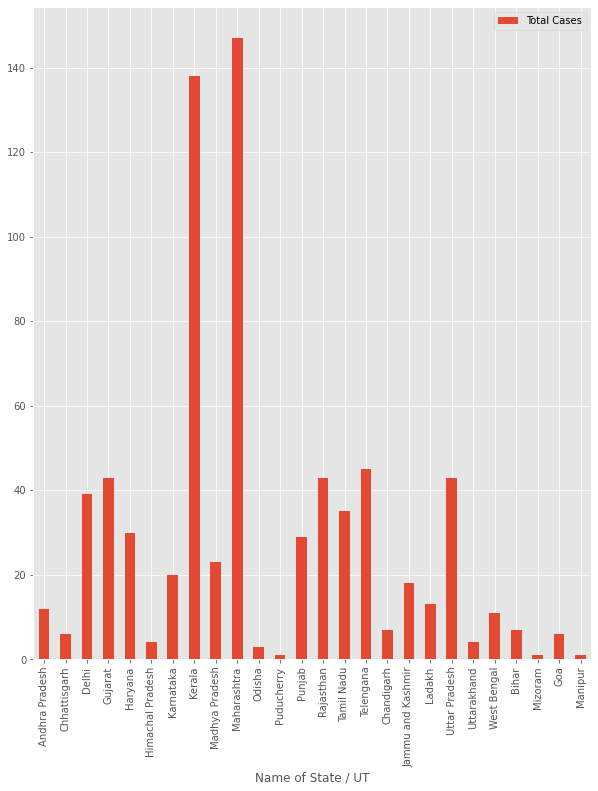

In [16]:
plt.rcParams['figure.figsize'] = 10,12
df.plot(kind="bar",x="Name of State / UT",y="Total Cases")

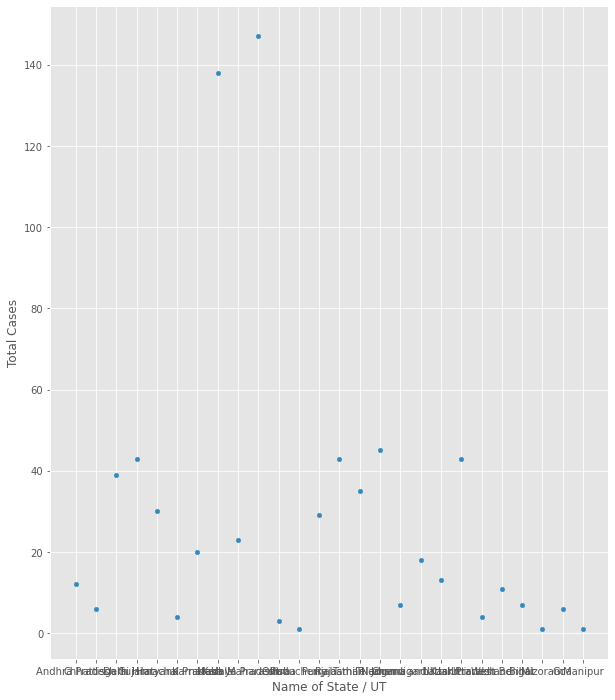

In [17]:
df.plot(kind="scatter",x="Name of State / UT",y="Total Cases")

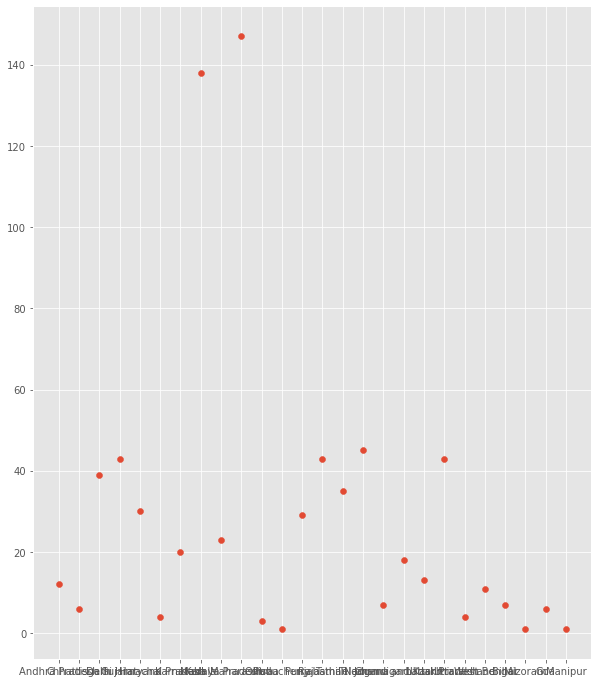

In [18]:
plt.scatter(df["Name of State / UT"],df["Total Cases"])

Text(0, 0.5, 'Total Cases')

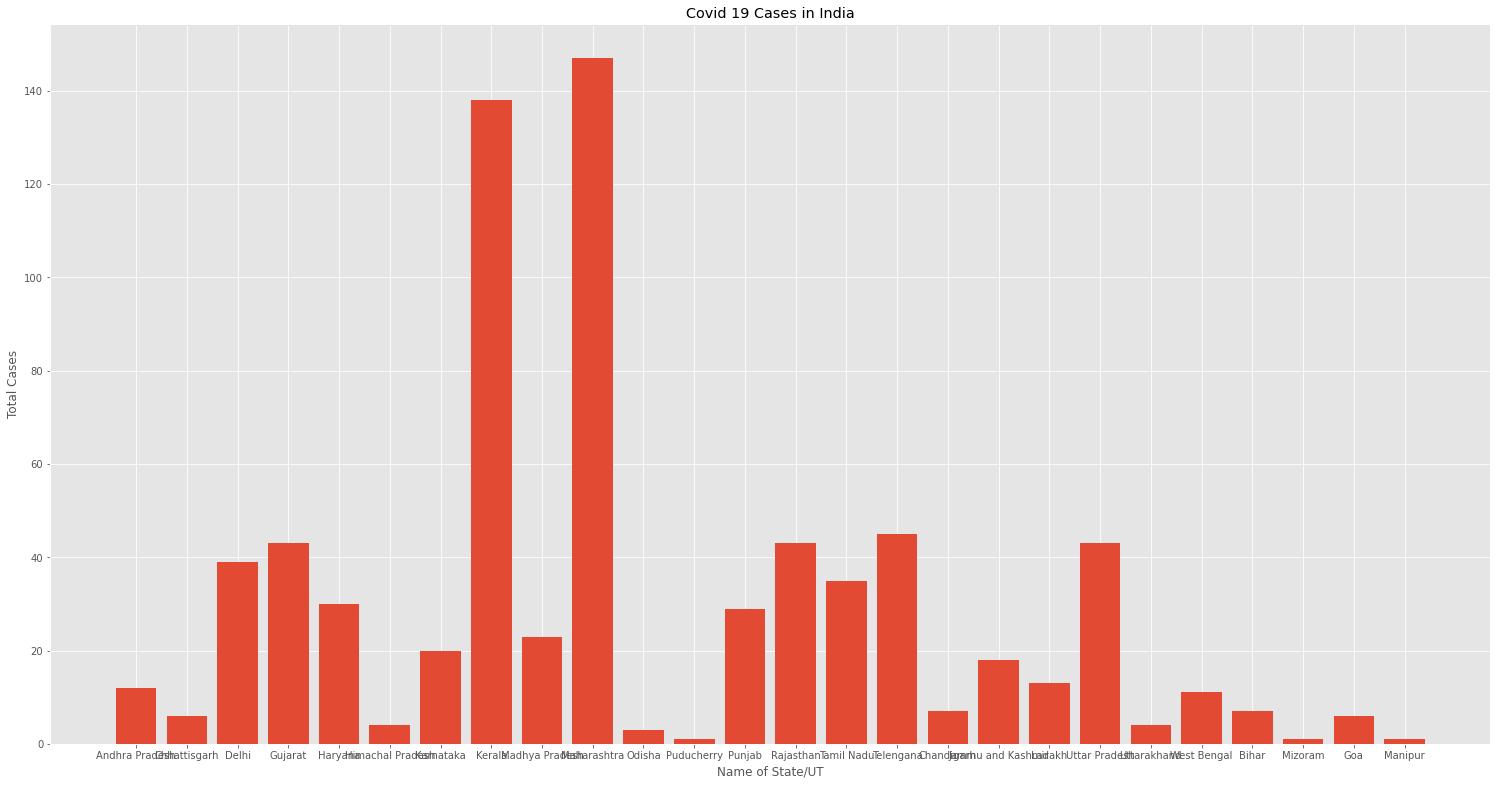

In [19]:
fig = plt.figure(figsize=(20,10))
axes = fig.add_axes([0,0,1,1])
axes.bar(df["Name of State / UT"],df["Total Cases"])
axes.set_title("Covid 19 Cases in India")
axes.set_xlabel("Name of State/UT")
axes.set_ylabel("Total Cases")

In [20]:
coord = pd.read_excel("/kaggle/input/corona-dataset/dataset/Indian Coordinates.xlsx")
df_full = pd.merge(coord,df,on="Name of State / UT")

In [21]:
coord.head()

,Name of State / UT,Latitude,Longitude
0,Andaman And Nicobar,11.667026,92.735983
1,Andhra Pradesh,14.750429,78.570026
2,Arunachal Pradesh,27.100399,93.616601
3,Assam,26.749981,94.216667
4,Bihar,25.785414,87.479973


In [22]:
df_full.head()

,Name of State / UT,Latitude,Longitude,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total Cases,Active Cases
0,Andhra Pradesh,14.750429,78.570026,12,0,1,0,12,11
1,Delhi,28.669993,77.230004,38,1,6,1,39,32
2,Haryana,28.450006,77.019991,16,14,11,0,30,19
3,Karnataka,12.570381,76.919997,20,0,3,2,20,15
4,Kerala,8.900373,76.569993,131,7,11,0,138,127


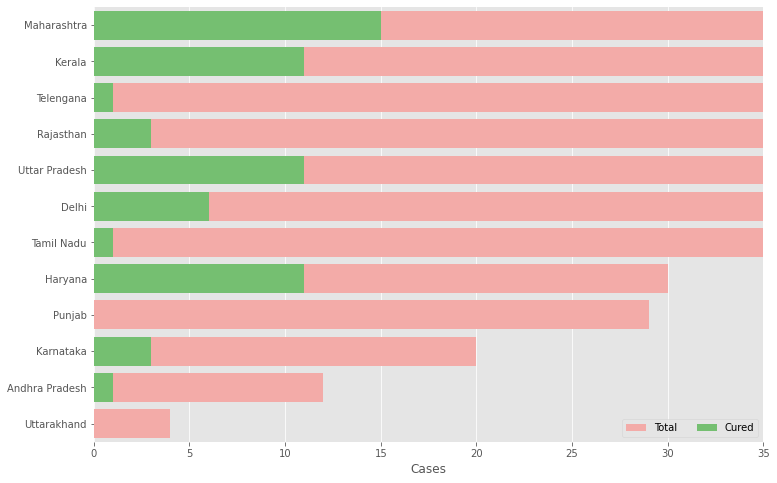

In [23]:
f,ax = plt.subplots(figsize=(12,8))
data = df_full[['Name of State / UT',"Total Cases","Cured","Death"]]
data.sort_values('Total Cases',ascending=False,inplace=True)
sns.set_color_codes("pastel")
sns.barplot(x="Total Cases", y="Name of State / UT", data=data, label="Total",color="r")

sns.set_color_codes("muted")
sns.barplot(x="Cured", y="Name of State / UT", data=data, label="Cured",color="g")

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0,35), ylabel="", xlabel="Cases")
sns.despine(left=True, bottom=True)

In [24]:
#Global Analysis of Coronavirus
dbd_India = pd.read_excel("/kaggle/input/corona-dataset/dataset/per_day_cases.xlsx",parse_dates=True, sheet_name="India")
dbd_SK = pd.read_excel("/kaggle/input/corona-dataset/dataset/per_day_cases.xlsx",parse_dates=True, sheet_name="Korea")
dbd_Italy = pd.read_excel("/kaggle/input/corona-dataset/dataset/per_day_cases.xlsx",parse_dates=True, sheet_name="Italy")
dbd_Wuhan = pd.read_excel("/kaggle/input/corona-dataset/dataset/per_day_cases.xlsx",parse_dates=True, sheet_name="Wuhan")

In [25]:
dbd_India.head()

,Date,Total Cases,New Cases,Days after surpassing 100 cases
0,2020-01-30,1,1,NaN
1,2020-01-31,1,0,NaN
2,2020-02-01,1,0,NaN
3,2020-02-02,2,1,NaN
4,2020-02-03,3,1,NaN


In [26]:
dbd_SK.head()

,Date,Total Cases,New Cases,Days after surpassing 100 cases
0,2020-01-20,1,1,NaN
1,2020-01-21,1,0,NaN
2,2020-01-22,1,0,NaN
3,2020-01-23,1,0,NaN
4,2020-01-24,2,1,NaN


In [27]:
dbd_Italy.head()

,Date,Total Cases,New Cases,Days after surpassing 100 cases
0,2020-01-31,2,2,NaN
1,2020-02-01,2,0,NaN
2,2020-02-02,2,0,NaN
3,2020-02-03,2,0,NaN
4,2020-02-04,2,0,NaN


In [28]:
dbd_Wuhan.head()

,Date,Total Cases,New Cases
0,2020-01-22,444,0
1,2020-01-23,444,0
2,2020-01-24,549,105
3,2020-01-25,761,212
4,2020-01-26,1058,297


Text(0.5, 1.0, 'COVID Cases in India')

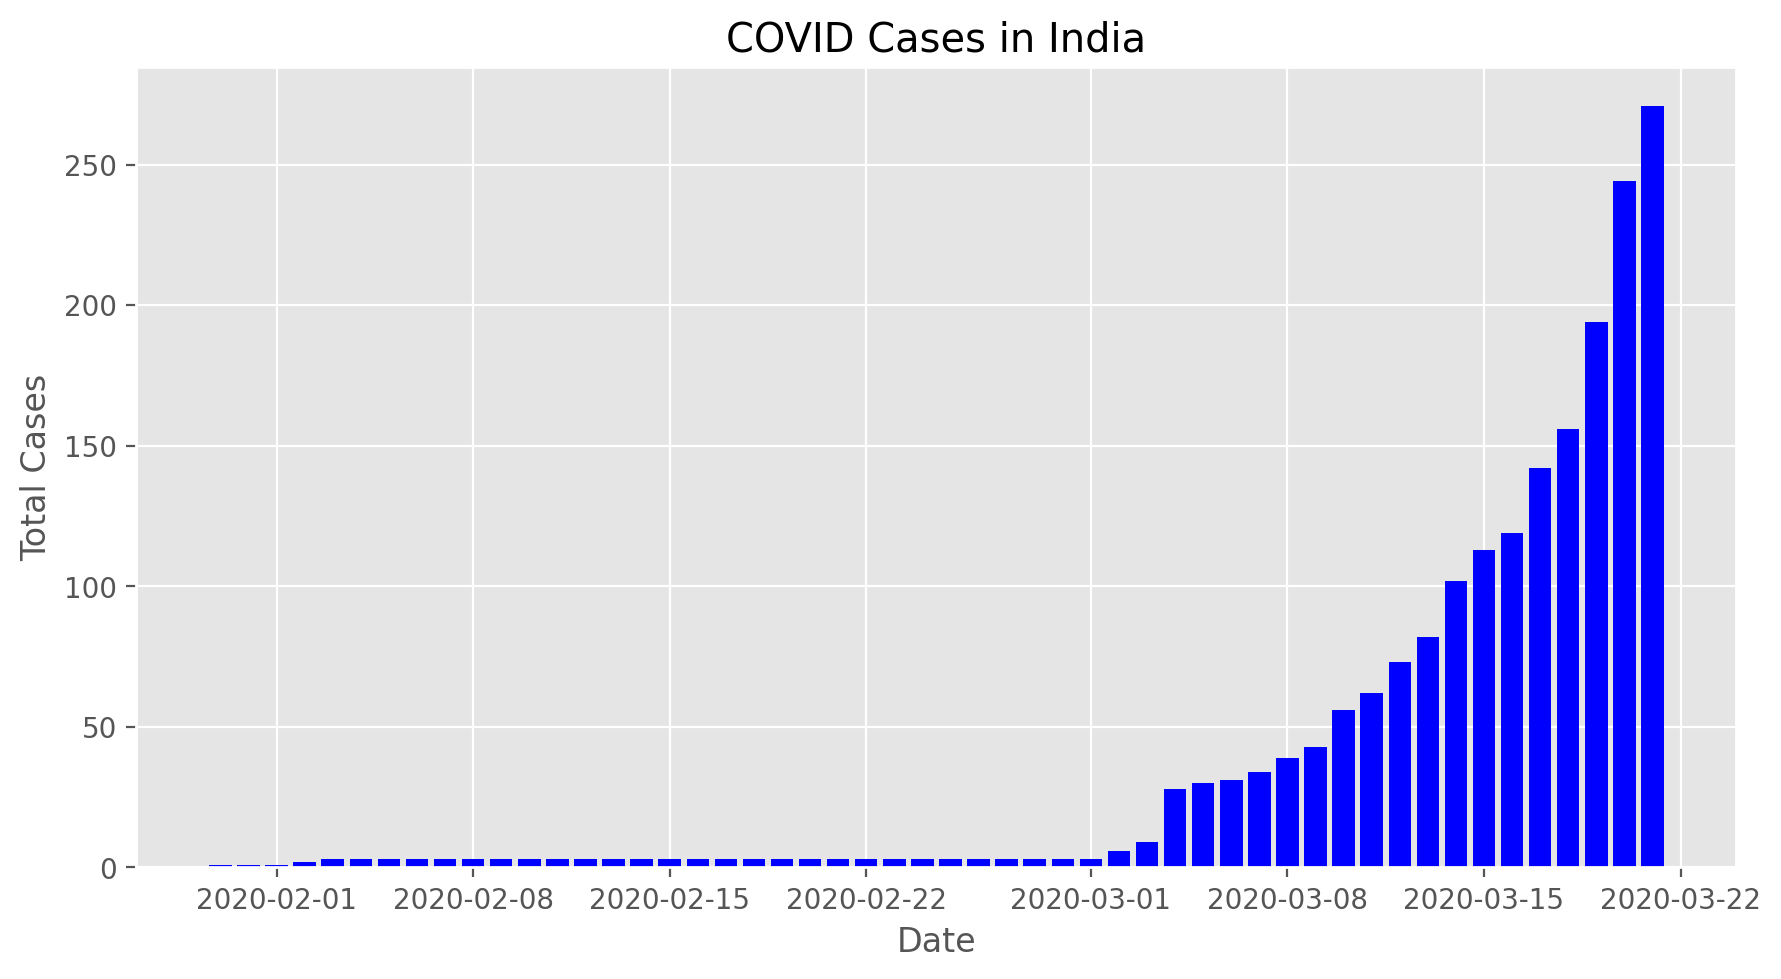

In [37]:
fig = plt.figure(figsize=(10,5),dpi=200)
axes = fig.add_axes([0.1,0.1,0.8,0.8])
axes.bar(dbd_India["Date"],dbd_India["Total Cases"],color='blue')
axes.set_xlabel("Date")
axes.set_ylabel("Total Cases")
axes.set_title("COVID Cases in India")

Text(0.5, 1.0, 'COVID Cases in India')

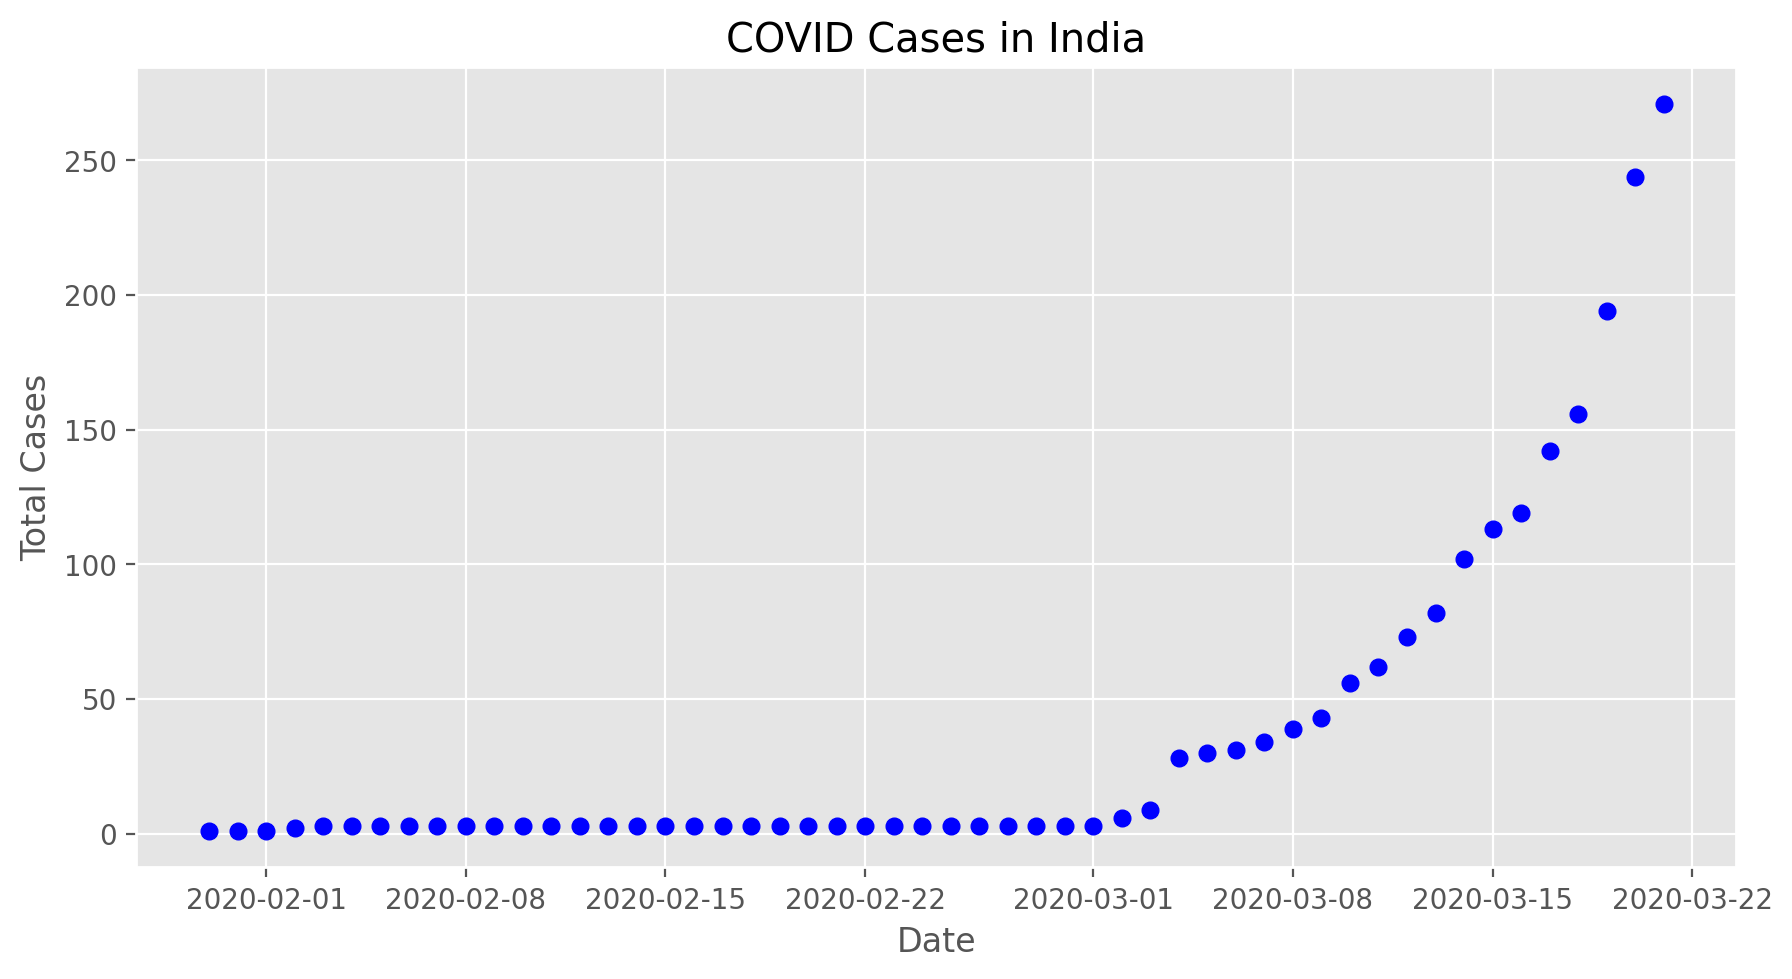

In [30]:
fig = plt.figure(figsize=(10,5),dpi=200)
axes = fig.add_axes([0.1,0.1,0.8,0.8])
axes.scatter(dbd_India["Date"],dbd_India["Total Cases"],color='blue')
axes.set_xlabel("Date")
axes.set_ylabel("Total Cases")
axes.set_title("COVID Cases in India")

Text(0.5, 1.0, 'COVID Cases in Italy')

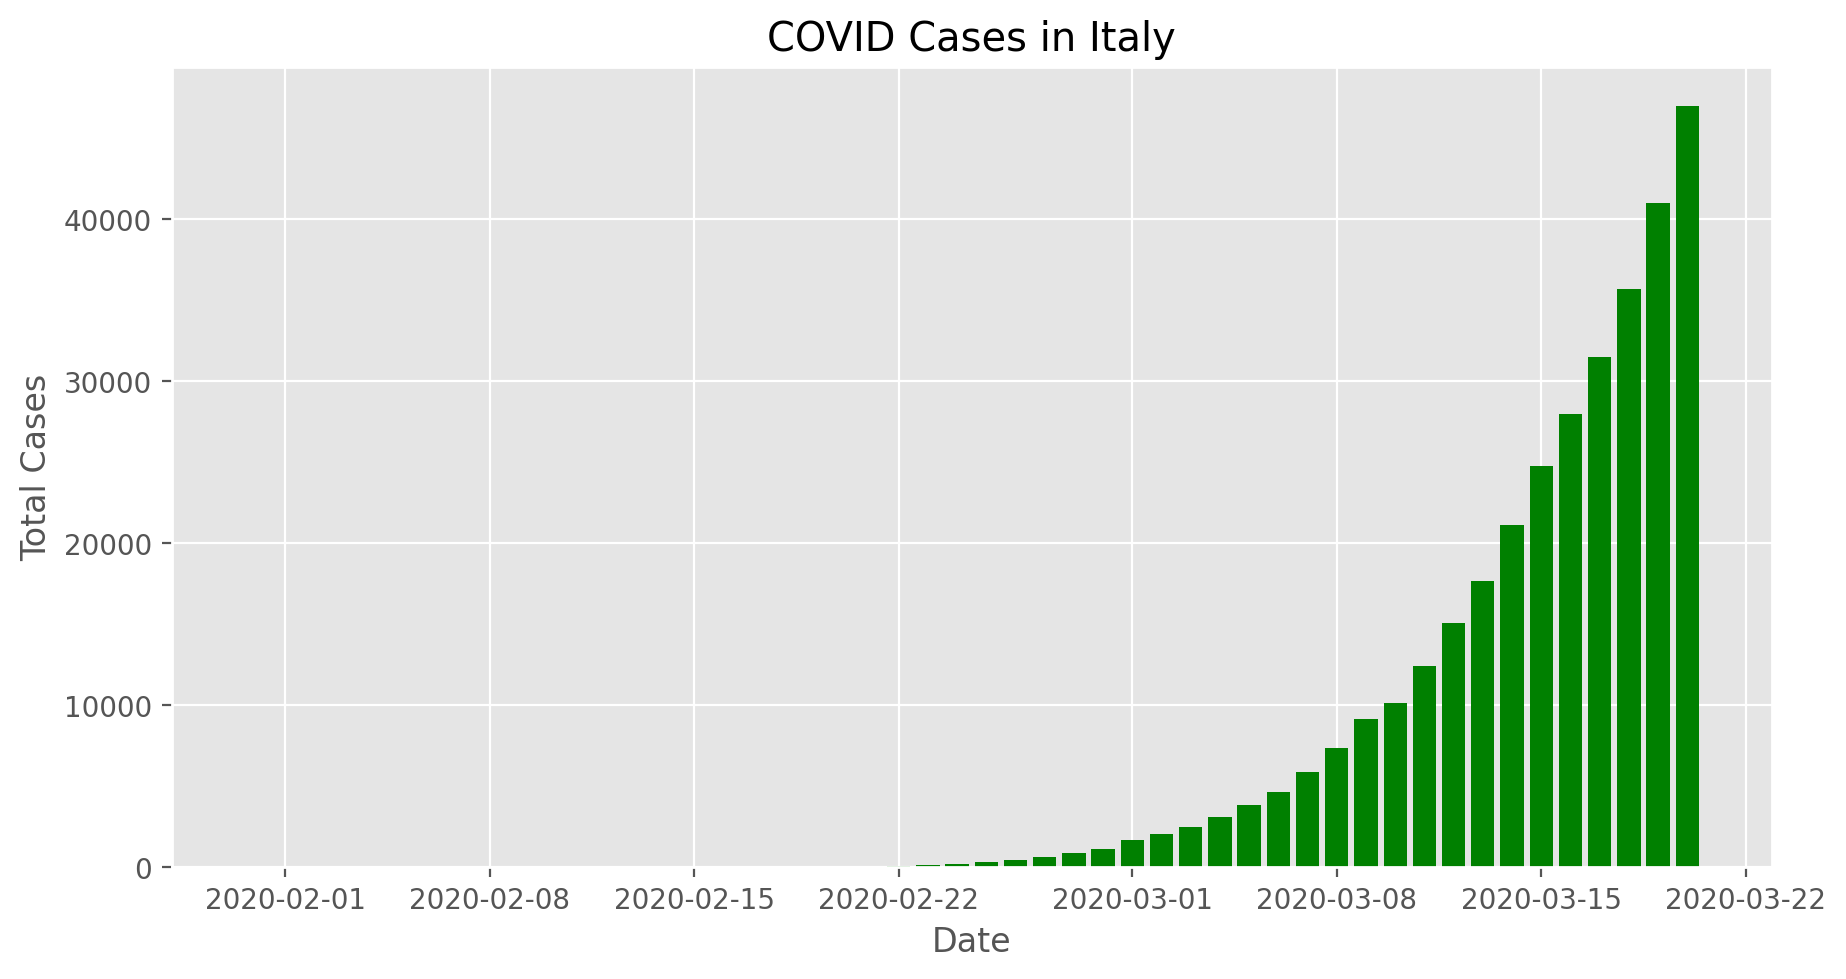

In [31]:
fig = plt.figure(figsize=(10,5),dpi=200)
axes = fig.add_axes([0.1,0.1,0.8,0.8])
axes.bar(dbd_Italy["Date"],dbd_Italy["Total Cases"],color='green')
axes.set_xlabel("Date")
axes.set_ylabel("Total Cases")
axes.set_title("COVID Cases in Italy")

Text(0.5, 1.0, 'COVID Cases in Italy')

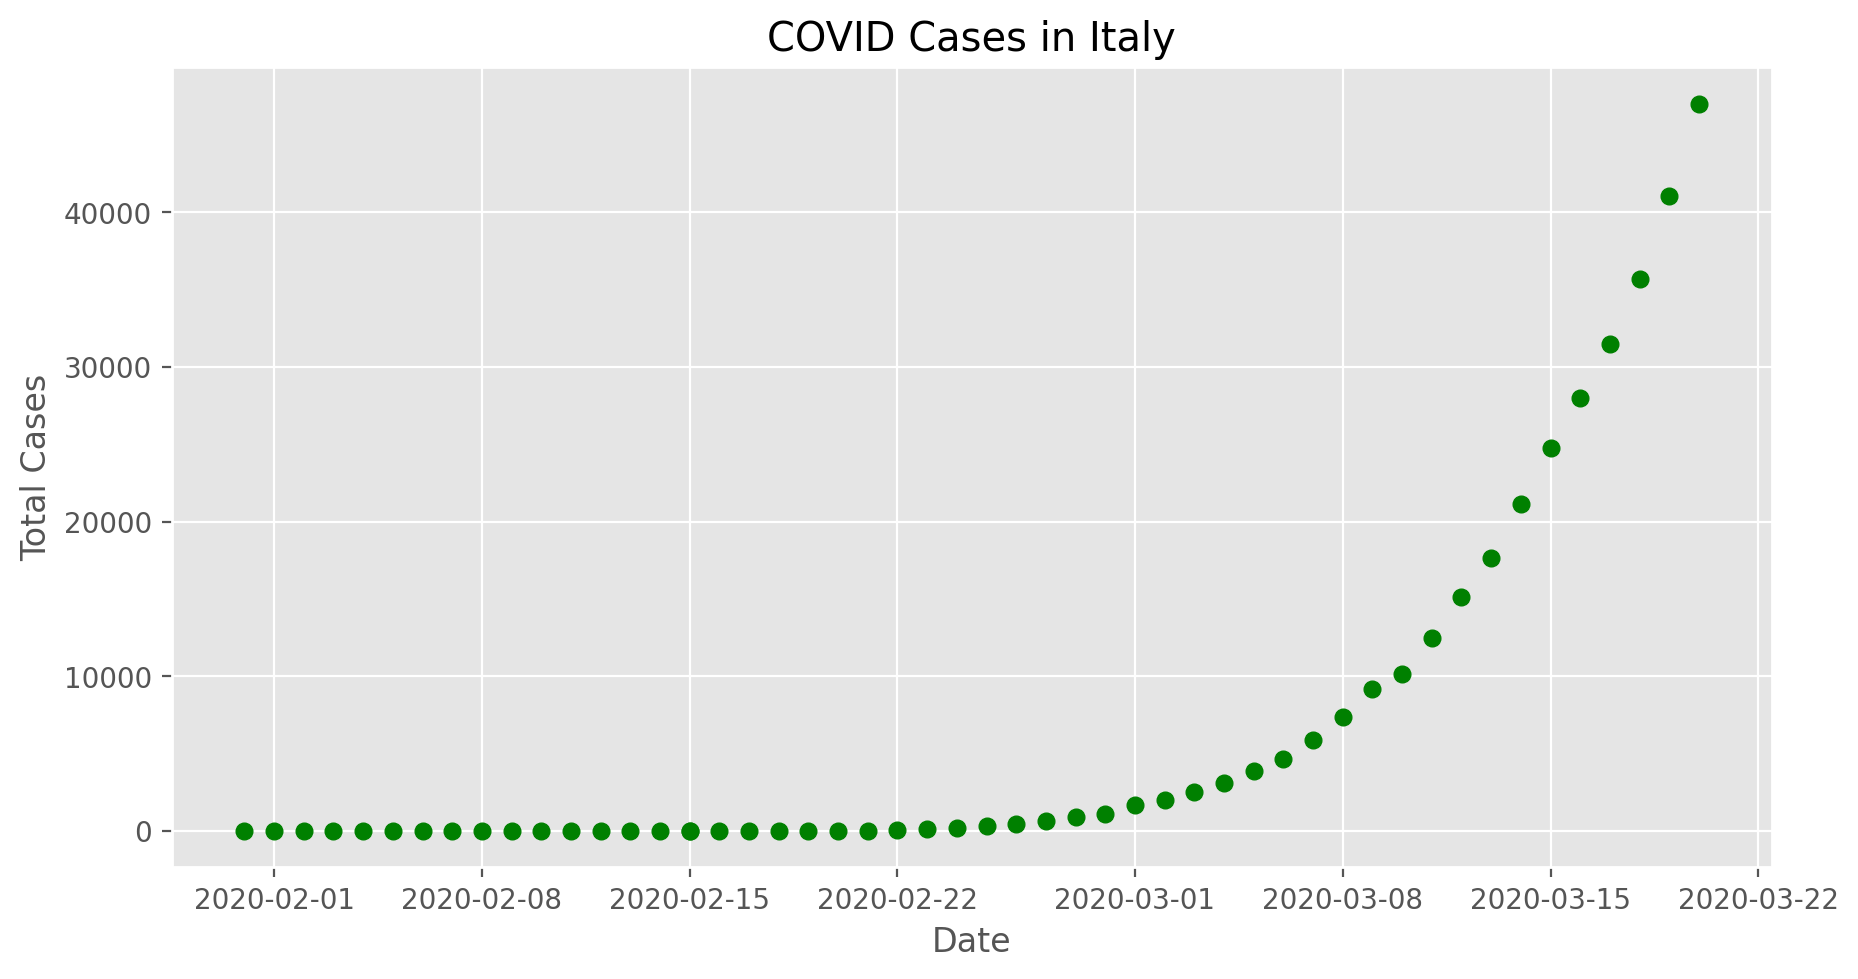

In [32]:
fig = plt.figure(figsize=(10,5),dpi=200)
axes = fig.add_axes([0.1,0.1,0.8,0.8])
axes.scatter(dbd_Italy["Date"],dbd_Italy["Total Cases"],color='green')
axes.set_xlabel("Date")
axes.set_ylabel("Total Cases")
axes.set_title("COVID Cases in Italy")

Text(0.5, 1.0, 'COVID Cases in South Korea')

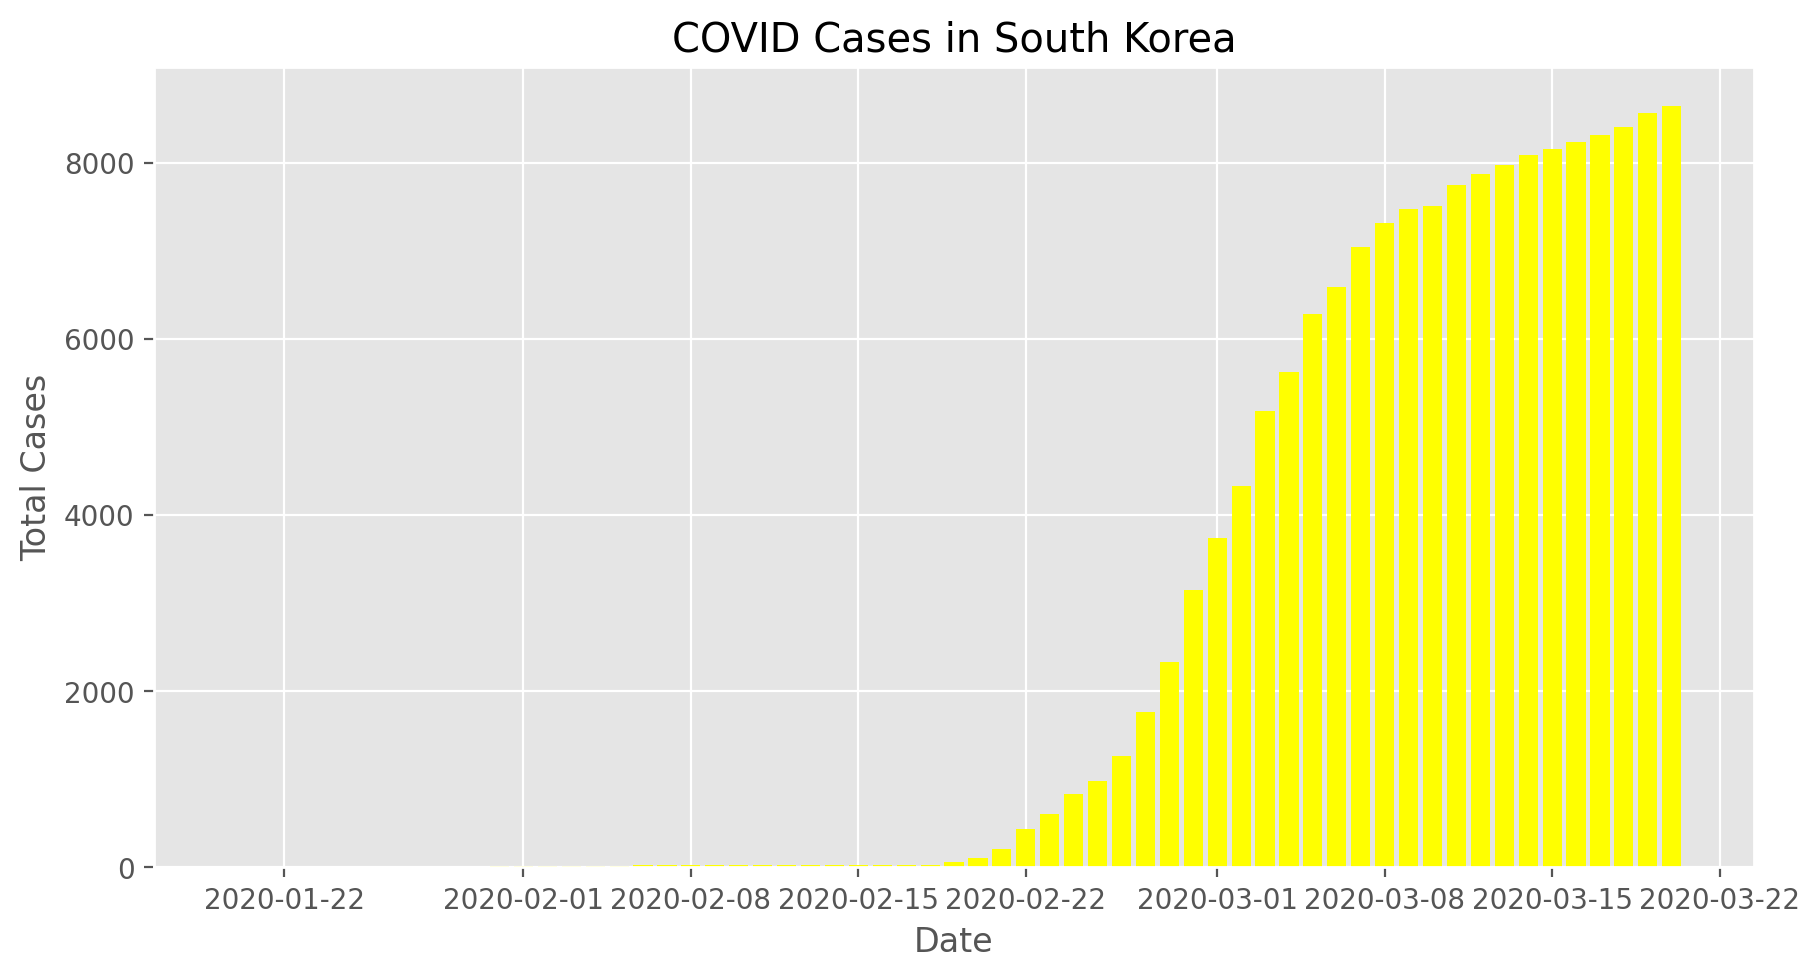

In [33]:
fig = plt.figure(figsize=(10,5),dpi=200)
axes = fig.add_axes([0.1,0.1,0.8,0.8])
axes.bar(dbd_SK["Date"],dbd_SK["Total Cases"],color='yellow')
axes.set_xlabel("Date")
axes.set_ylabel("Total Cases")
axes.set_title("COVID Cases in South Korea")

Text(0.5, 1.0, 'COVID Cases in South Korea')

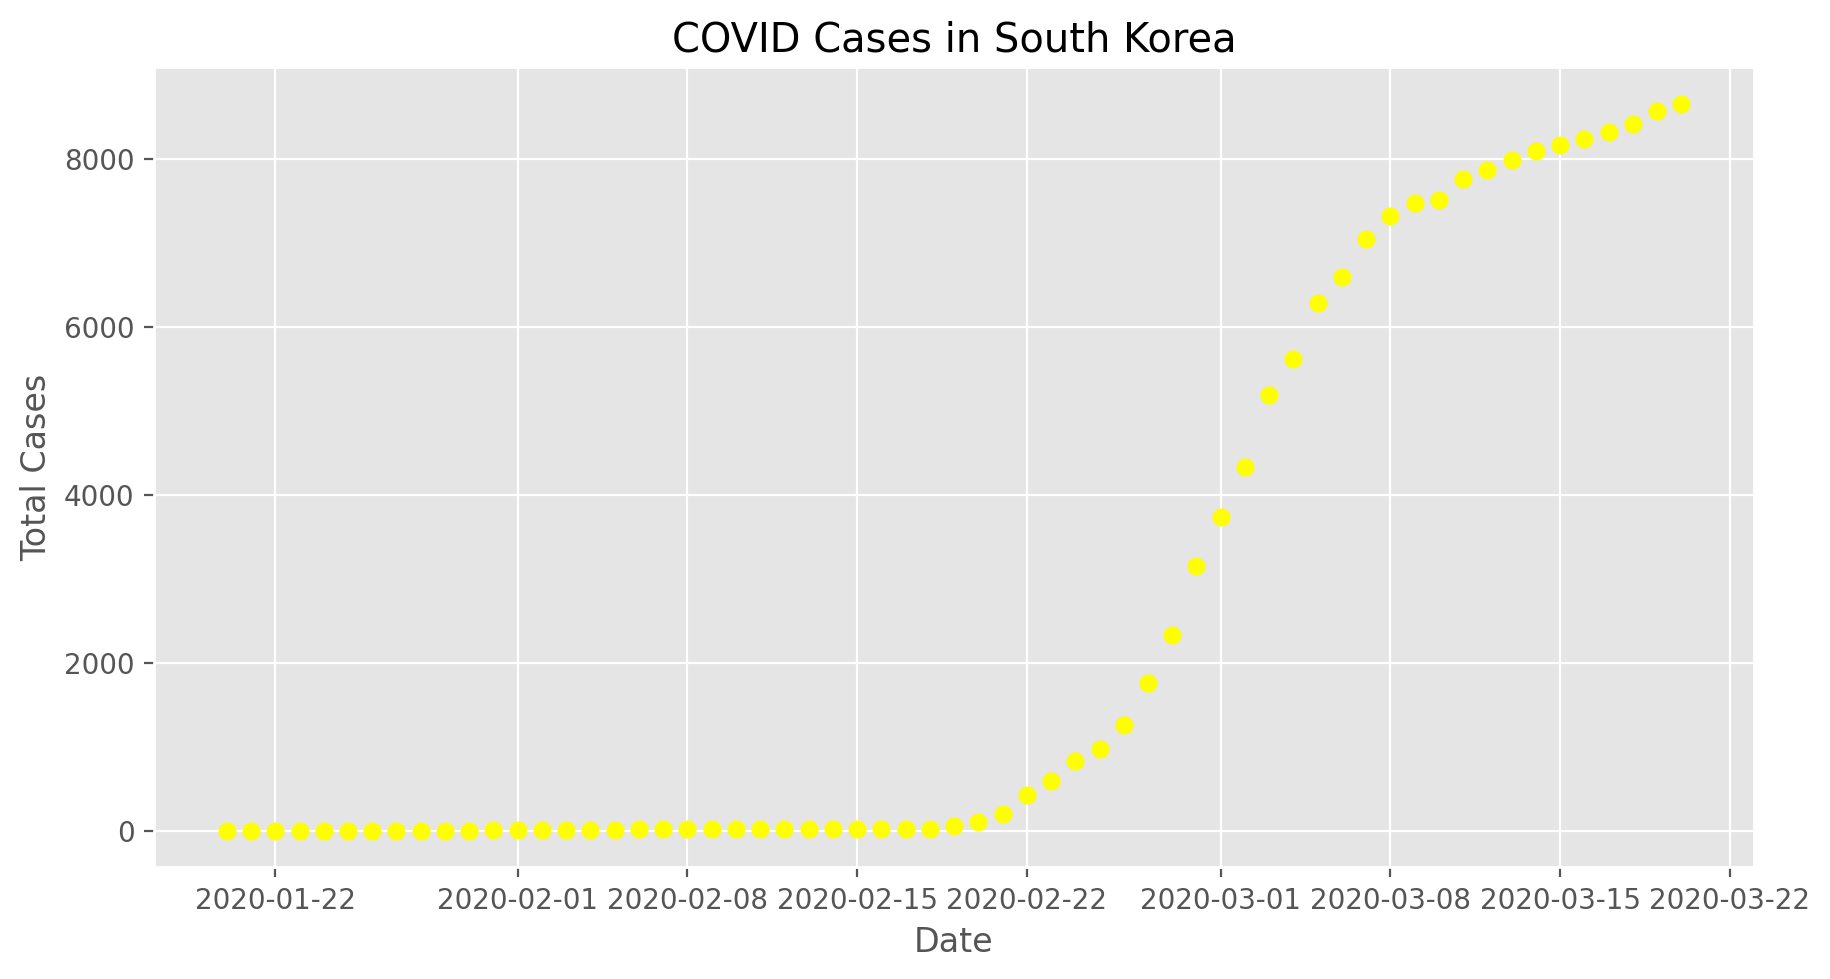

In [34]:
fig = plt.figure(figsize=(10,5),dpi=200)
axes = fig.add_axes([0.1,0.1,0.8,0.8])
axes.scatter(dbd_SK["Date"],dbd_SK["Total Cases"],color='yellow')
axes.set_xlabel("Date")
axes.set_ylabel("Total Cases")
axes.set_title("COVID Cases in South Korea")

Text(0.5, 1.0, 'COVID Cases in Wuhan')

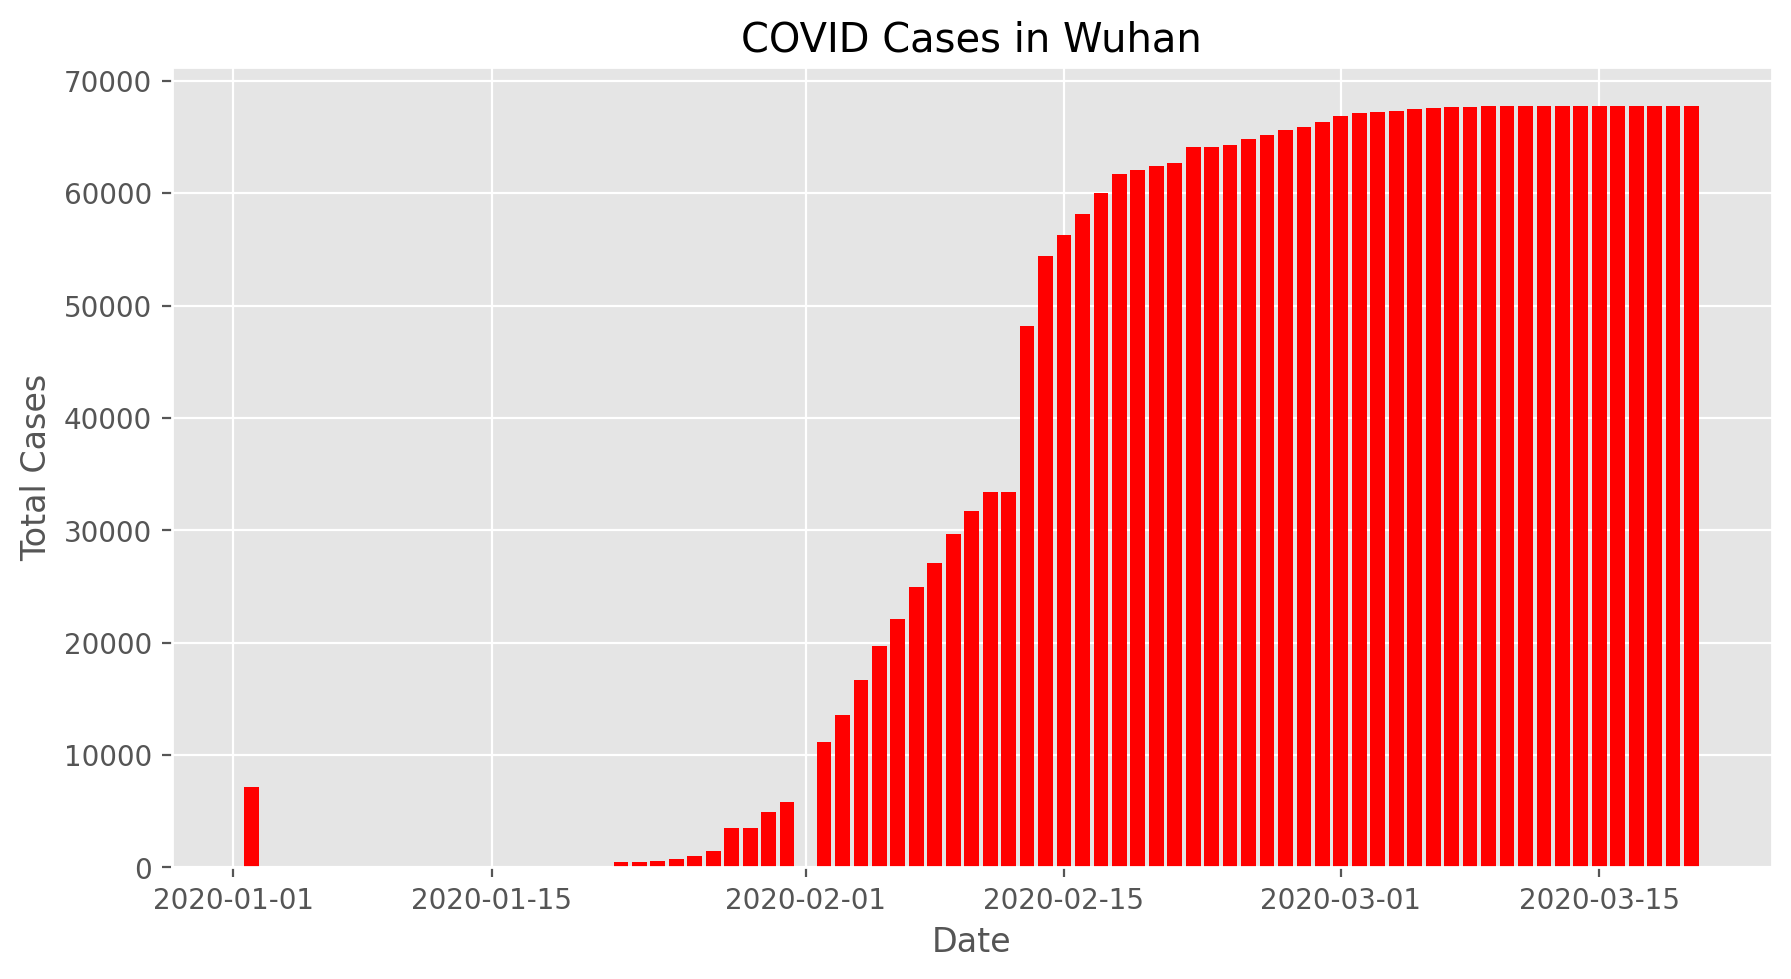

In [35]:
fig = plt.figure(figsize=(10,5),dpi=200)
axes = fig.add_axes([0.1,0.1,0.8,0.8])
axes.bar(dbd_Wuhan["Date"],dbd_Wuhan["Total Cases"],color='red')
axes.set_xlabel("Date")
axes.set_ylabel("Total Cases")
axes.set_title("COVID Cases in Wuhan")

Text(0.5, 1.0, 'COVID Cases in Wuhan')

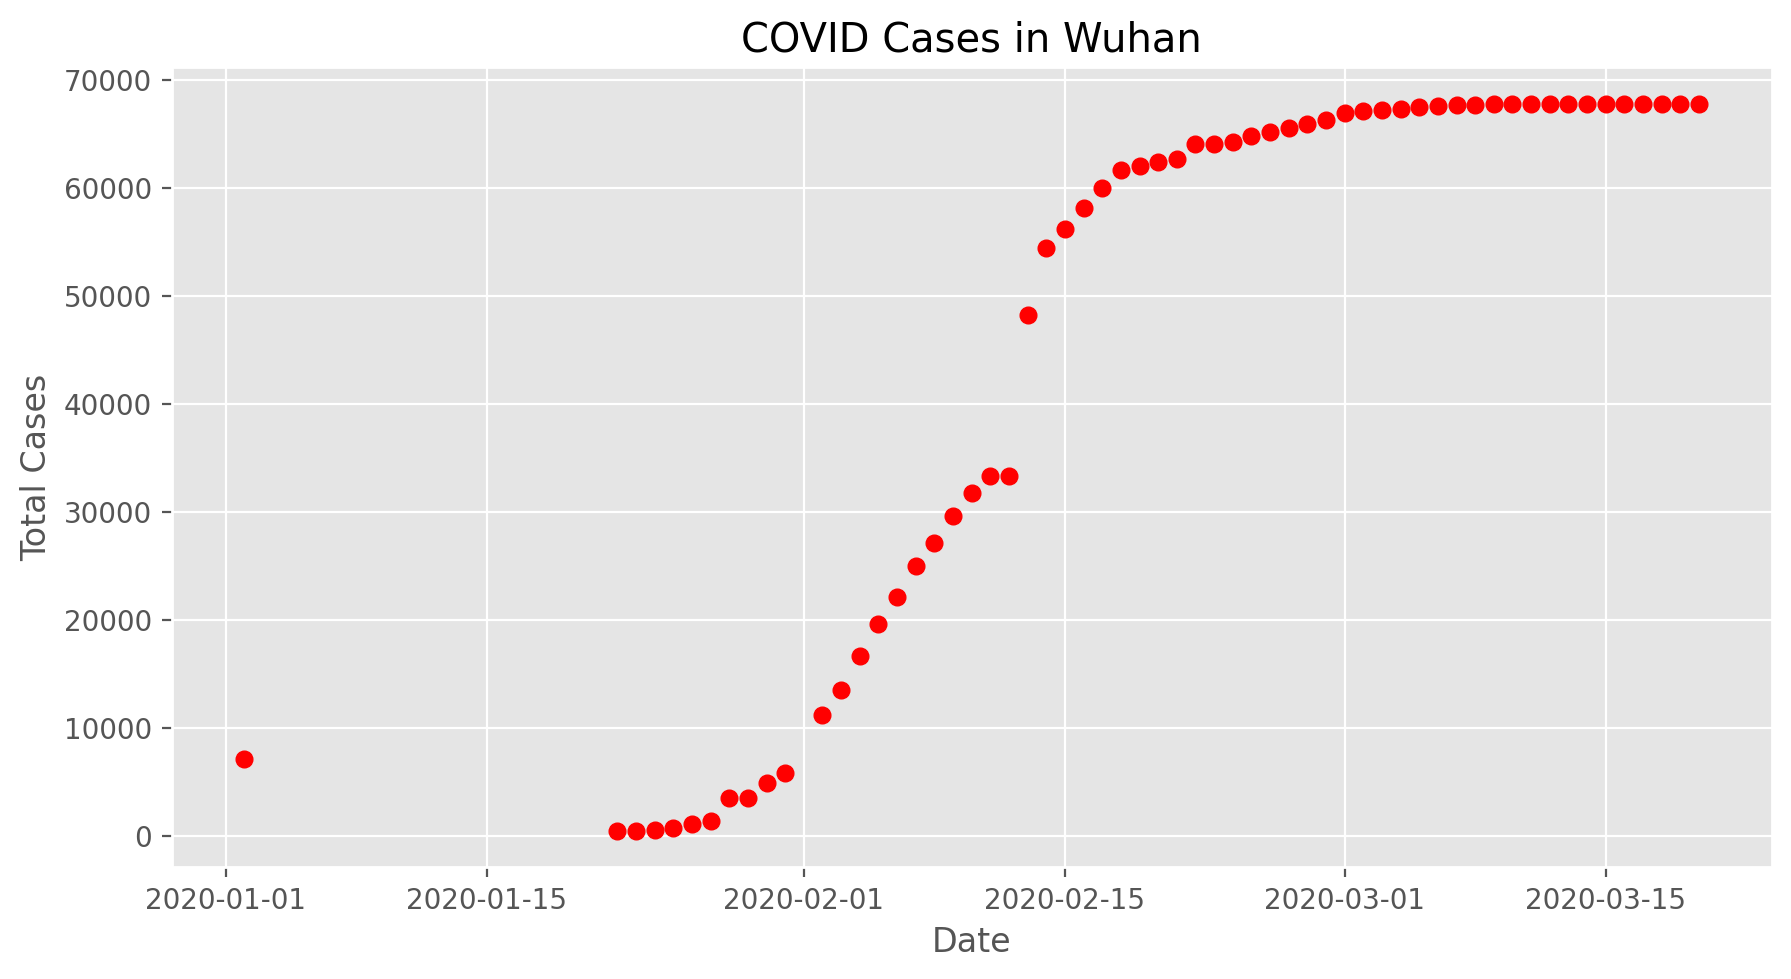

In [36]:
fig = plt.figure(figsize=(10,5),dpi=200)
axes = fig.add_axes([0.1,0.1,0.8,0.8])
axes.scatter(dbd_Wuhan["Date"],dbd_Wuhan["Total Cases"],color='red')
axes.set_xlabel("Date")
axes.set_ylabel("Total Cases")
axes.set_title("COVID Cases in Wuhan")

Text(0.5, 1.0, 'COVID Cases in India')

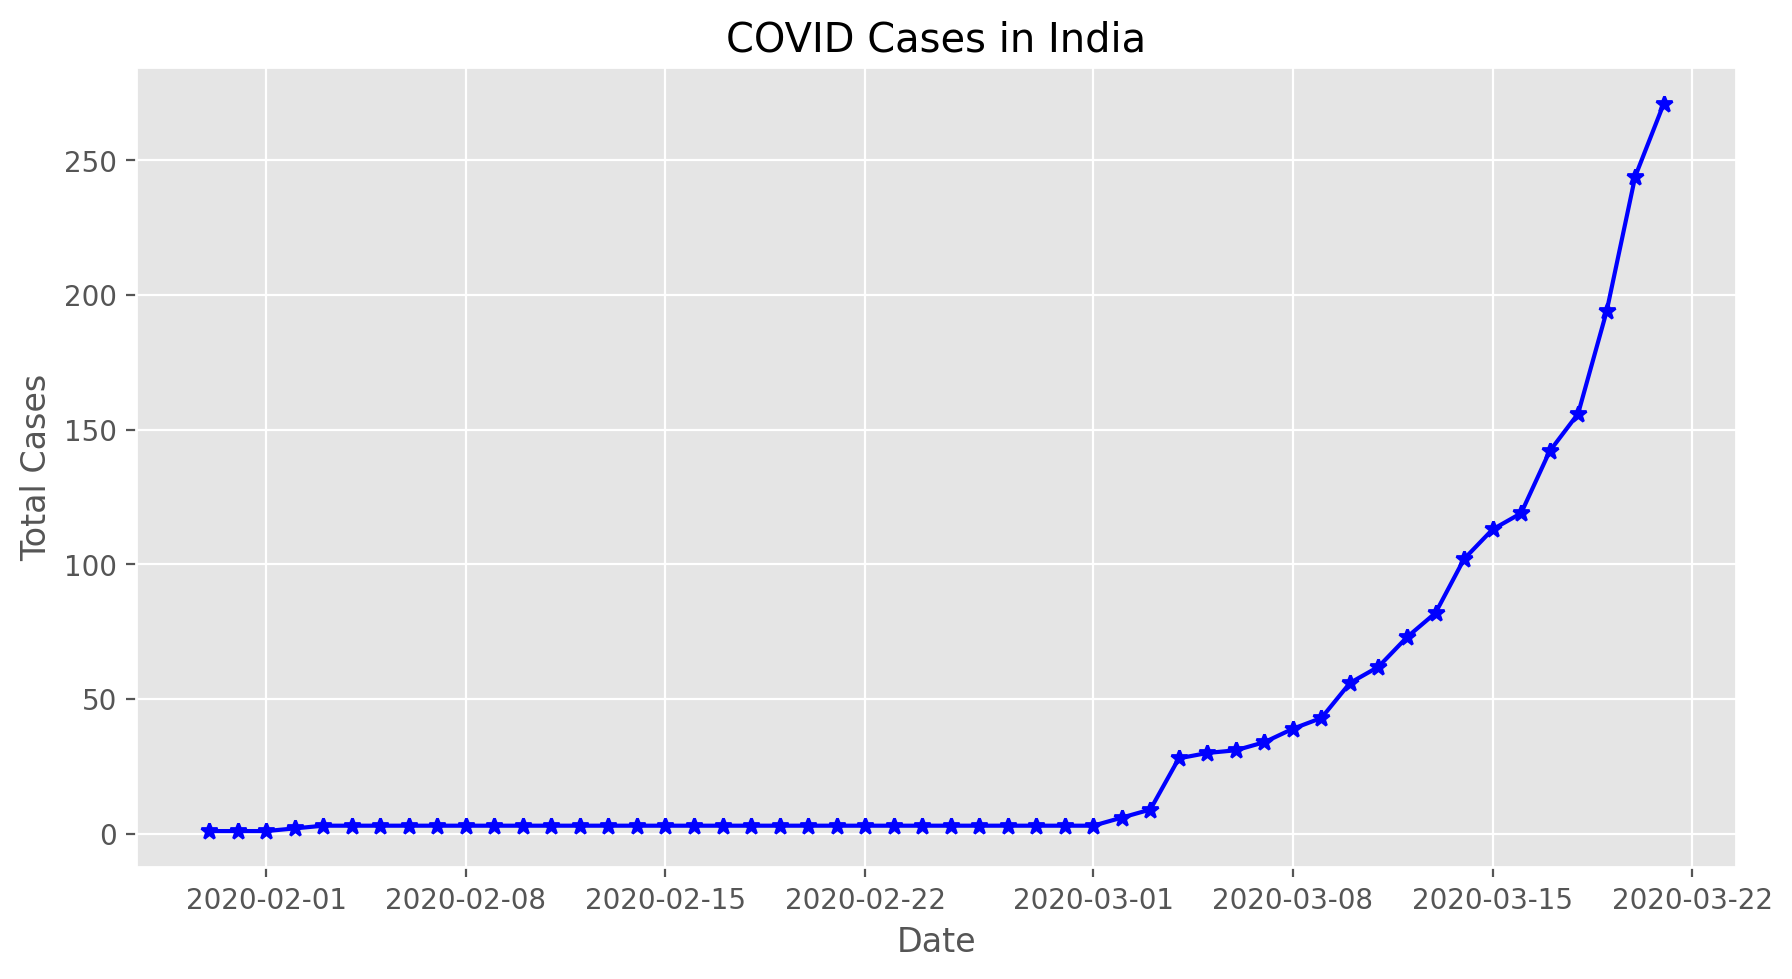

In [38]:
#Changing Marker
fig = plt.figure(figsize=(10,5),dpi=200)
axes = fig.add_axes([0.1,0.1,0.8,0.8])
axes.plot(dbd_India["Date"],dbd_India["Total Cases"],color='blue',marker="*")
axes.set_xlabel("Date")
axes.set_ylabel("Total Cases")
axes.set_title("COVID Cases in India")

Text(0.5, 1.0, 'COVID Cases in India')

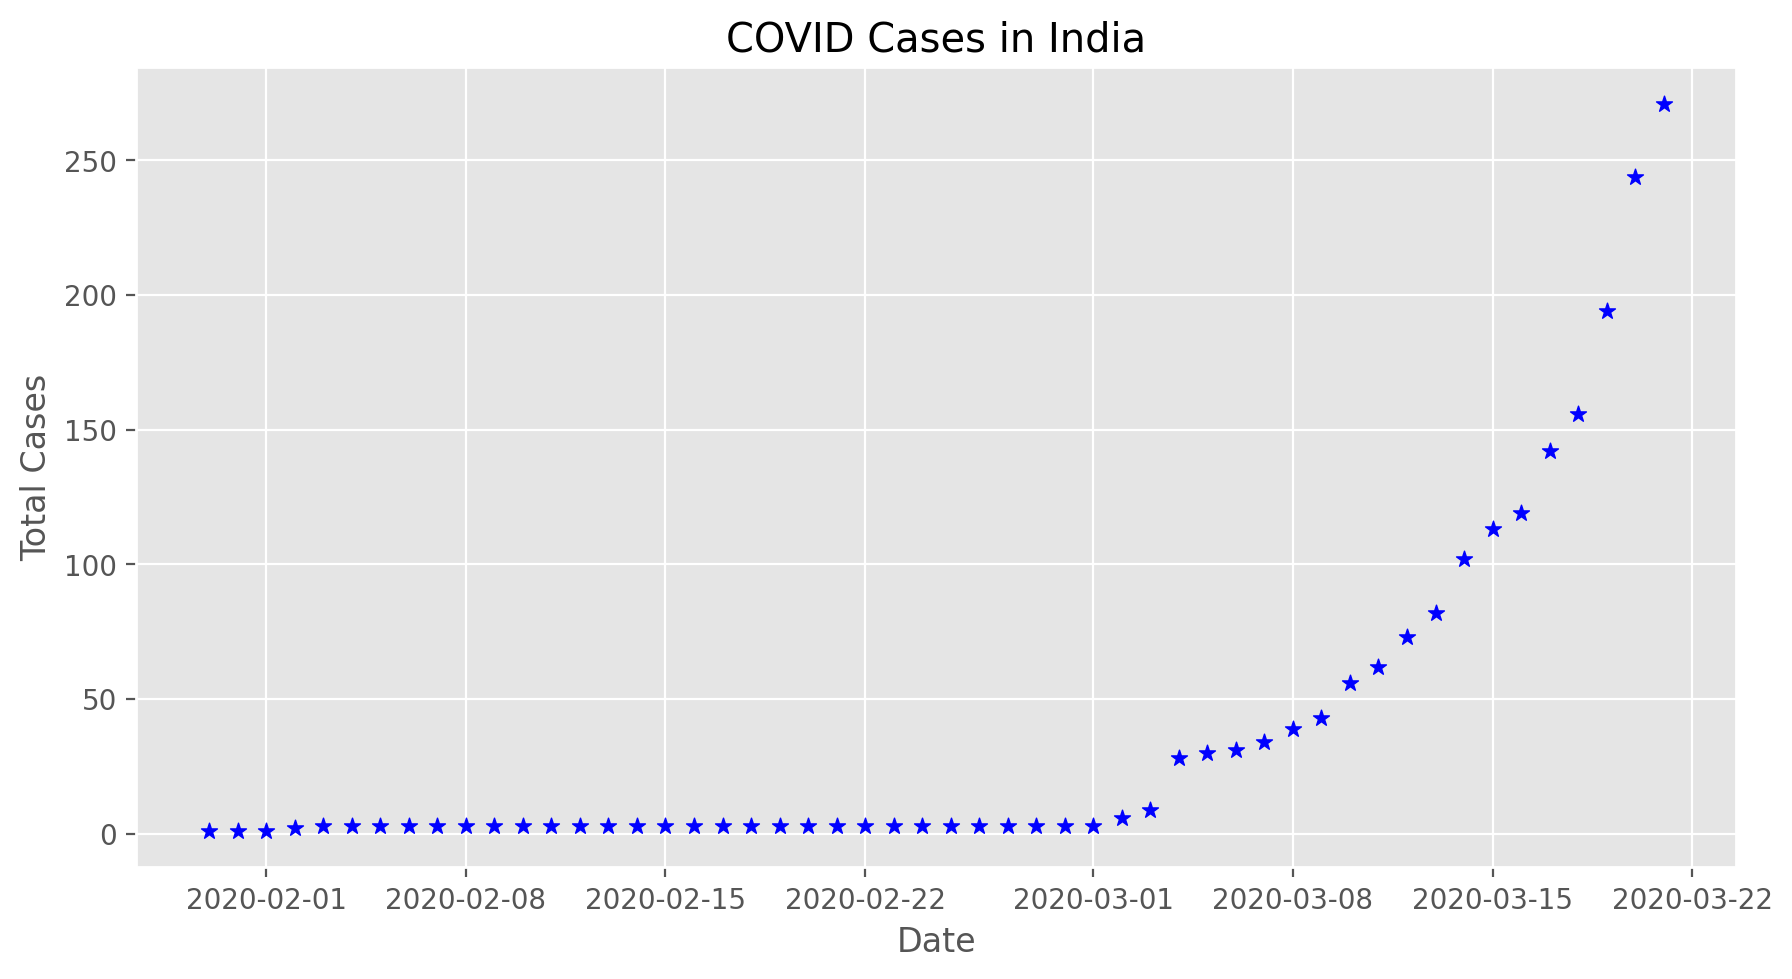

In [39]:
fig = plt.figure(figsize=(10,5),dpi=200)
axes = fig.add_axes([0.1,0.1,0.8,0.8])
axes.scatter(dbd_India["Date"],dbd_India["Total Cases"],color='blue',marker="*")
axes.set_xlabel("Date")
axes.set_ylabel("Total Cases")
axes.set_title("COVID Cases in India")

In [40]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=dbd_India['Date'],y=dbd_India['Total Cases'],mode='lines+markers'))
fig.update_layout(title_text="Trend of Coronvirus Cases in India(Cumulative Cases)",plot_bgcolor='rgb(230,230,230)')

In [41]:
#Daily Reported COVID Cases in India
fig = px.bar(dbd_India, x="Date", y="New Cases", barmode="group", height=400)
fig.update_layout(title_text="Coronavirus Cases in India on Daily Basis",plot_bgcolor="rgb(230,230,230)")

In [42]:
px.scatter(df, x="Name of State / UT",y="Total Cases")

In [43]:
fig = go.Figure()
fig.add_trace(go.Bar(x=df["Name of State / UT"], y=df["Active Cases"]))
fig.update_layout(title="COVID Cases in India",xaxis=dict(title='Name of State / UT'),yaxis=dict(title='Total Cases'))

In [44]:
fig = px.bar(dbd_India, x="Date", y="Total Cases", color="Total Cases", title="COVID in India")
fig.show()

In [45]:
fig = px.scatter(dbd_India, x="Date", y="Total Cases", color="Total Cases", title="COVID in India")
fig.show()

In [46]:
fig = px.bar(dbd_Italy, x="Date", y="Total Cases", color="Total Cases", title="COVID in Italy")
fig.show()

In [47]:
fig = px.scatter(dbd_Italy, x="Date", y="Total Cases", color="Total Cases", title="COVID in Italy")
fig.show()

In [48]:
fig = px.bar(dbd_SK, x="Date", y="Total Cases", color="Total Cases", title="COVID in South Korea")
fig.show()

In [49]:
fig = px.scatter(dbd_SK, x="Date", y="Total Cases", color="Total Cases", title="COVID in South Korea")
fig.show()

In [50]:
fig = px.bar(dbd_Wuhan, x="Date", y="Total Cases", color="Total Cases", title="COVID in Wuhan")
fig.show()

In [51]:
fig = px.scatter(dbd_Wuhan, x="Date", y="Total Cases", color="Total Cases", title="COVID in Wuhan")
fig.show()

In [52]:
from plotly.subplots import make_subplots
fig = make_subplots(
    rows=2,cols=2,
    specs=[[{"secondary_y":True},{"secondary_y":True}],[{"secondary_y":True},{"secondary_y":True}]],
    subplot_titles=("S. Korea","Italy","India","Wuhan")
)

fig.add_trace(go.Bar(x=dbd_SK['Date'], y=dbd_SK['Total Cases'], marker=dict(color=dbd_SK['Total Cases'], coloraxis='coloraxis')),1,1)
fig.add_trace(go.Bar(x=dbd_Italy['Date'], y=dbd_Italy['Total Cases'], marker=dict(color=dbd_Italy['Total Cases'], coloraxis='coloraxis')),1,2)
fig.add_trace(go.Bar(x=dbd_India['Date'], y=dbd_India['Total Cases'], marker=dict(color=dbd_India['Total Cases'], coloraxis='coloraxis')),2,1)
fig.add_trace(go.Bar(x=dbd_Wuhan['Date'], y=dbd_Wuhan['Total Cases'], marker=dict(color=dbd_Wuhan['Total Cases'], coloraxis='coloraxis')),2,2)

fig.update_layout(coloraxis = dict(colorscale="Bluered_r"),showlegend=False,title_text="Total COVID Cases in 4 Countries")
fig.update_layout(plot_bgcolor = 'rgb(230,230,230)')
fig.show()

In [53]:
fig = make_subplots(
    rows=2,cols=2,
    specs=[[{"secondary_y":True},{"secondary_y":True}],[{"secondary_y":True},{"secondary_y":True}]],
    subplot_titles=("S. Korea","Italy","India","Wuhan")
)

fig.add_trace(go.Scatter(x=dbd_SK['Date'], y=dbd_SK['Total Cases'], marker=dict(color=dbd_SK['Total Cases'], coloraxis='coloraxis')),1,1)
fig.add_trace(go.Scatter(x=dbd_Italy['Date'], y=dbd_Italy['Total Cases'], marker=dict(color=dbd_Italy['Total Cases'], coloraxis='coloraxis')),1,2)
fig.add_trace(go.Scatter(x=dbd_India['Date'], y=dbd_India['Total Cases'], marker=dict(color=dbd_India['Total Cases'], coloraxis='coloraxis')),2,1)
fig.add_trace(go.Scatter(x=dbd_Wuhan['Date'], y=dbd_Wuhan['Total Cases'], marker=dict(color=dbd_Wuhan['Total Cases'], coloraxis='coloraxis')),2,2)

fig.update_layout(coloraxis = dict(colorscale="Bluered_r"),showlegend=False,title_text="Total COVID Cases in 4 Countries")
fig.update_layout(plot_bgcolor = 'rgb(230,230,230)')

In [54]:
df_confirmed = pd.read_csv("/kaggle/input/corona-dataset/dataset/time_series_covid_19_confirmed.csv")
df_confirmed

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,47,48,50,50,50,53,59,70,75,82
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,360,420,461,502,511,581,639,639,701,773
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,117,130,138,150,150,160,178,178,200,212
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,50,83,93,99,117,129,149,149,197,238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437,NaN,Saint Lucia,13.9094,-60.9789,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
438,NaN,Saint Vincent and the Grenadines,12.9843,-61.2872,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
439,NaN,Suriname,3.9193,-56.0278,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
440,"Virgin Islands, U.S.",US,18.3358,-64.8963,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [55]:
df_confirmed.rename(columns={'Country/Region':'Country'},inplace=True)
df_confirmed

,Province/State,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,47,48,50,50,50,53,59,70,75,82
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,360,420,461,502,511,581,639,639,701,773
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,117,130,138,150,150,160,178,178,200,212
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,50,83,93,99,117,129,149,149,197,238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437,NaN,Saint Lucia,13.9094,-60.9789,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
438,NaN,Saint Vincent and the Grenadines,12.9843,-61.2872,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
439,NaN,Suriname,3.9193,-56.0278,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
440,"Virgin Islands, U.S.",US,18.3358,-64.8963,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [58]:
df = pd.read_csv("/kaggle/input/corona-dataset/dataset/covid_19_data.csv")
df = pd.read_csv("/kaggle/input/corona-dataset/dataset/covid_19_data.csv",parse_dates=['Last Update'])
df.rename(columns={'ObservationDate':'Date','Country/Region':'Country'}, inplace=True)
df.groupby('Date').sum()

,SNo,Confirmed,Deaths,Recovered
Date,,,,
01/22/2020,741,555.0,17.0,28.0
01/23/2020,2829,653.0,18.0,30.0
01/24/2020,4305,941.0,26.0,36.0
01/25/2020,6490,1438.0,42.0,39.0
01/26/2020,9071,2118.0,56.0,52.0
01/27/2020,12342,2927.0,82.0,61.0
01/28/2020,15262,5578.0,131.0,107.0
01/29/2020,18711,6165.0,133.0,126.0
01/30/2020,23345,8235.0,171.0,143.0


In [59]:
confirmed = df.groupby('Date').sum()['Confirmed'].to_frame().reset_index()
deaths = df.groupby('Date').sum()['Deaths'].to_frame().reset_index()
recover = df.groupby('Date').sum()['Recovered'].to_frame().reset_index()

In [60]:
confirmed.head()

,Date,Confirmed
0,01/22/2020,555.0
1,01/23/2020,653.0
2,01/24/2020,941.0
3,01/25/2020,1438.0
4,01/26/2020,2118.0


In [61]:
deaths.head()

,Date,Deaths
0,01/22/2020,17.0
1,01/23/2020,18.0
2,01/24/2020,26.0
3,01/25/2020,42.0
4,01/26/2020,56.0


In [62]:
recover.head()

,Date,Recovered
0,01/22/2020,28.0
1,01/23/2020,30.0
2,01/24/2020,36.0
3,01/25/2020,39.0
4,01/26/2020,52.0


In [63]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=confirmed['Date'],y=confirmed['Confirmed'],mode='lines+markers',name='Confirmed',line=dict(color='blue')))
fig.add_trace(go.Scatter(x=deaths['Date'],y=deaths['Deaths'],mode='lines+markers',name='Deaths',line=dict(color='red')))
fig.add_trace(go.Scatter(x=recover['Date'],y=recover['Recovered'],mode='lines+markers',name='Recovered',line=dict(color='green')))

In [64]:
map = folium.Map(location=[20,70],zoom_start=5, tiles="CartoDB Dark_Matter")
for lat,long,value,name in zip(df_full['Latitude'], df_full['Longitude'], df_full['Total Cases'], df_full['Name of State / UT']):
  folium.CircleMarker([lat,long], radius=value*0.3, popup=('<strong>State</strong>: '+str(name).capitalize()+'<br>'+'<strong>Total Cases</strong>'+str(value)+'<br>'),
  color = 'red', fill_color='red',fill_opacity=0.3).add_to(map)
map

In [65]:
#Trend after crossing 100 Cases
labels = ['S. Korea','Italy','India','Wuhan']
colors = ["rgb(122,128,0)","rgb(255,0,0)","rgb(49,130,189)","rgb(0,255,0)"]
mode_size = [10,10,12,12]
line_size = [1,1,8,8]

fig = go.Figure()

fig.add_trace(go.Scatter(x=dbd_SK['Days after surpassing 100 cases'], 
                         y=dbd_SK['Total Cases'],
                         mode='lines',
                         name=labels[0],
                         line=dict(color=colors[0], width=line_size[0]),
                         connectgaps=True))

fig.add_trace(go.Scatter(x=dbd_Italy['Days after surpassing 100 cases'], 
                         y=dbd_Italy['Total Cases'],
                         mode='lines',
                         name=labels[1],
                         line=dict(color=colors[1], width=line_size[1]),
                         connectgaps=True))

fig.add_trace(go.Scatter(x=dbd_India['Days after surpassing 100 cases'], 
                         y=dbd_India['Total Cases'],
                         mode='lines',
                         name=labels[2],
                         line=dict(color=colors[2], width=line_size[2]),
                         connectgaps=True))

annotations = []

annotations.append(dict(xref='paper',yref='paper',x=0.5,y=0.1,
                        xanchor="center",yanchor="top",
                        text="Days after crossing 100 cases",
                        font = dict(family="Arial",
                                    size=12,
                                    color="rgb(150,150,150)"),
                        showarrow=False
                        ))

fig.update_layout(annotations=annotations, plot_bgcolor="white",yaxis_title="Total Cases")
fig.show()

In [66]:
from fbprophet import Prophet
confirmed.columns

Index(['Date', 'Confirmed'], dtype='object')

In [67]:
confirmed.columns = ['ds','y']
confirmed['ds'] = pd.to_datetime(confirmed['ds'])
confirmed.head()

,ds,y
0,2020-01-22,555.0
1,2020-01-23,653.0
2,2020-01-24,941.0
3,2020-01-25,1438.0
4,2020-01-26,2118.0


In [68]:
m = Prophet(interval_width=0.96)
m.fit(confirmed)
future = m.make_future_dataframe(periods=7)
future.head()

,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26


In [69]:
forecast = m.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-7637.718574,-24103.198233,5720.791994,-7637.718574,-7637.718574,-1041.950710,-1041.950710,-1041.950710,-1041.950710,-1041.950710,-1041.950710,0.0,0.0,0.0,-8679.669284
1,2020-01-23,-4969.073596,-21107.421618,10179.579920,-4969.073596,-4969.073596,-395.184795,-395.184795,-395.184795,-395.184795,-395.184795,-395.184795,0.0,0.0,0.0,-5364.258391
2,2020-01-24,-2300.428619,-17175.971520,14400.614910,-2300.428619,-2300.428619,1150.329707,1150.329707,1150.329707,1150.329707,1150.329707,1150.329707,0.0,0.0,0.0,-1150.098912
3,2020-01-25,368.216359,-14059.014790,17265.355501,368.216359,368.216359,1598.966706,1598.966706,1598.966706,1598.966706,1598.966706,1598.966706,0.0,0.0,0.0,1967.183065
4,2020-01-26,3036.861335,-10279.273902,22009.859562,3036.861335,3036.861335,2381.730958,2381.730958,2381.730958,2381.730958,2381.730958,2381.730958,0.0,0.0,0.0,5418.592293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2020-03-18,149745.844024,132062.159296,164712.502434,149573.719708,149911.398265,-1041.950710,-1041.950710,-1041.950710,-1041.950710,-1041.950710,-1041.950710,0.0,0.0,0.0,148703.893314
57,2020-03-19,152980.663500,137056.086025,168406.765075,152702.640462,153228.206129,-395.184795,-395.184795,-395.184795,-395.184795,-395.184795,-395.184795,0.0,0.0,0.0,152585.478705
58,2020-03-20,156215.482976,141888.707425,171562.669101,155840.813675,156553.831278,1150.329707,1150.329707,1150.329707,1150.329707,1150.329707,1150.329707,0.0,0.0,0.0,157365.812683
59,2020-03-21,159450.302452,146188.429031,177688.429236,158948.986341,159903.681645,1598.966706,1598.966706,1598.966706,1598.966706,1598.966706,1598.966706,0.0,0.0,0.0,161049.269158


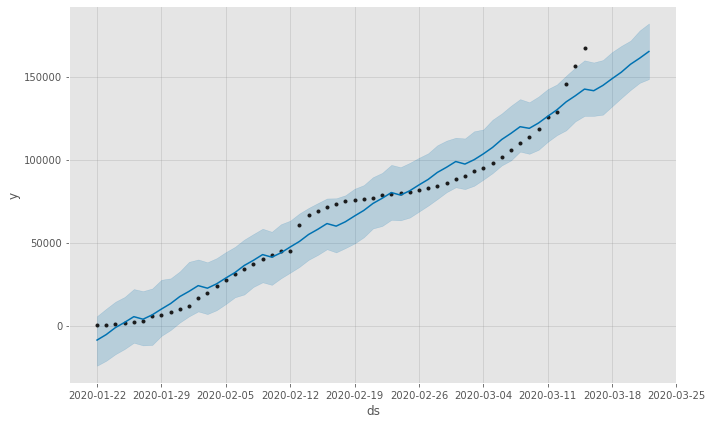

In [70]:
forecast_plot = m.plot(forecast)

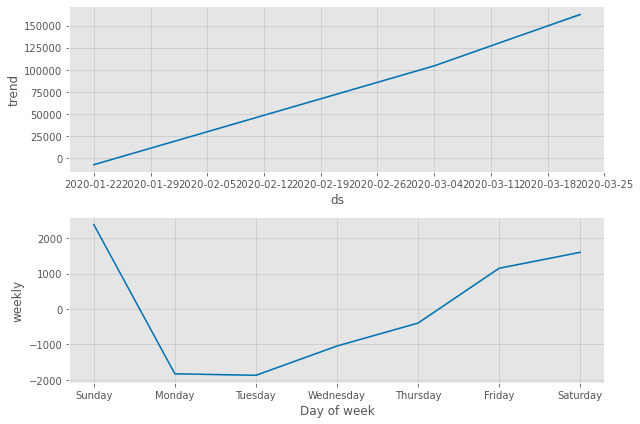

In [71]:
components_plot = m.plot_components(forecast)

In [72]:
deaths.columns

Index(['Date', 'Deaths'], dtype='object')

In [73]:
deaths.columns = ['ds','y']
deaths['ds'] = pd.to_datetime(deaths['ds'])
deaths.head()

,ds,y
0,2020-01-22,17.0
1,2020-01-23,18.0
2,2020-01-24,26.0
3,2020-01-25,42.0
4,2020-01-26,56.0


In [74]:
m = Prophet(interval_width=0.96)
m.fit(deaths)
future = m.make_future_dataframe(periods=7)
future.head()

,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26


In [75]:
forecast = m.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-275.690254,-678.503092,141.263818,-275.690254,-275.690254,-1.362909,-1.362909,-1.362909,-1.362909,-1.362909,-1.362909,0.0,0.0,0.0,-277.053163
1,2020-01-23,-206.939719,-639.005314,206.329347,-206.939719,-206.939719,-22.609545,-22.609545,-22.609545,-22.609545,-22.609545,-22.609545,0.0,0.0,0.0,-229.549264
2,2020-01-24,-138.189184,-548.067902,337.938552,-138.189184,-138.189184,8.004947,8.004947,8.004947,8.004947,8.004947,8.004947,0.0,0.0,0.0,-130.184237
3,2020-01-25,-69.438628,-447.125015,431.256755,-69.438628,-69.438628,30.619452,30.619452,30.619452,30.619452,30.619452,30.619452,0.0,0.0,0.0,-38.819176
4,2020-01-26,-0.688056,-369.081673,527.794496,-0.688056,-0.688056,71.151216,71.151216,71.151216,71.151216,71.151216,71.151216,0.0,0.0,0.0,70.463160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2020-03-18,6139.788543,5745.384039,6566.077438,6100.694692,6178.080134,-1.362909,-1.362909,-1.362909,-1.362909,-1.362909,-1.362909,0.0,0.0,0.0,6138.425635
57,2020-03-19,6339.889038,5890.097596,6717.409901,6284.453651,6397.227151,-22.609545,-22.609545,-22.609545,-22.609545,-22.609545,-22.609545,0.0,0.0,0.0,6317.279493
58,2020-03-20,6539.989533,6145.751668,6940.301184,6466.664478,6621.114254,8.004947,8.004947,8.004947,8.004947,8.004947,8.004947,0.0,0.0,0.0,6547.994480
59,2020-03-21,6740.090028,6327.830551,7210.923345,6644.295171,6838.100128,30.619452,30.619452,30.619452,30.619452,30.619452,30.619452,0.0,0.0,0.0,6770.709480


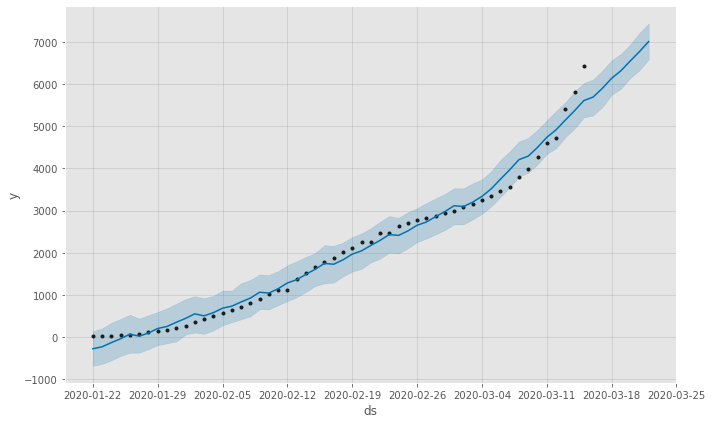

In [76]:
forecast_plot = m.plot(forecast)

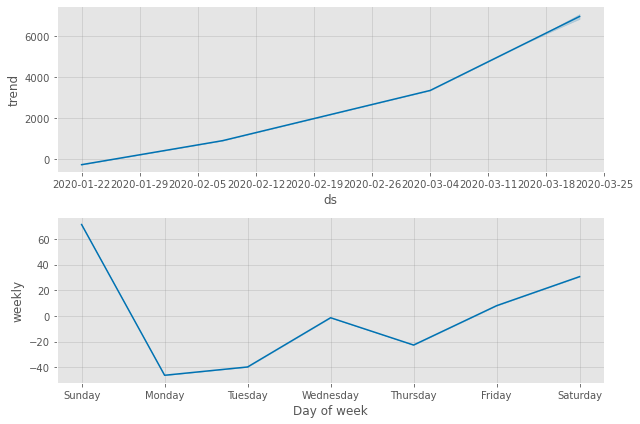

In [77]:
components_plot = m.plot_components(forecast)

In [78]:
recover.columns

Index(['Date', 'Recovered'], dtype='object')

In [79]:
recover.columns = ['ds','y']
recover['ds'] = pd.to_datetime(recover['ds'])
recover.head()

,ds,y
0,2020-01-22,28.0
1,2020-01-23,30.0
2,2020-01-24,36.0
3,2020-01-25,39.0
4,2020-01-26,52.0


In [80]:
m = Prophet(interval_width=0.96)
m.fit(recover)
future = m.make_future_dataframe(periods=7)
future.head()

,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26


In [81]:
forecast = m.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-14.394731,-737.529763,477.624830,-14.394731,-14.394731,-105.595559,-105.595559,-105.595559,-105.595559,-105.595559,-105.595559,0.0,0.0,0.0,-119.990290
1,2020-01-23,10.896490,-690.501997,509.112851,10.896490,10.896490,-113.028072,-113.028072,-113.028072,-113.028072,-113.028072,-113.028072,0.0,0.0,0.0,-102.131582
2,2020-01-24,36.187711,-782.146815,463.472149,36.187711,36.187711,-170.741316,-170.741316,-170.741316,-170.741316,-170.741316,-170.741316,0.0,0.0,0.0,-134.553606
3,2020-01-25,61.478932,-394.216205,837.300716,61.478932,61.478932,199.504953,199.504953,199.504953,199.504953,199.504953,199.504953,0.0,0.0,0.0,260.983884
4,2020-01-26,87.535071,-281.155173,881.173122,87.535071,87.535071,207.064426,207.064426,207.064426,207.064426,207.064426,207.064426,0.0,0.0,0.0,294.599497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2020-03-18,81764.630949,80578.392524,82668.638920,80864.961133,82770.460271,-105.595559,-105.595559,-105.595559,-105.595559,-105.595559,-105.595559,0.0,0.0,0.0,81659.035390
57,2020-03-19,83928.214494,82301.894565,85322.060292,82436.529399,85412.872924,-113.028072,-113.028072,-113.028072,-113.028072,-113.028072,-113.028072,0.0,0.0,0.0,83815.186422
58,2020-03-20,86091.798039,83688.544431,87956.260913,84062.992569,88104.877241,-170.741316,-170.741316,-170.741316,-170.741316,-170.741316,-170.741316,0.0,0.0,0.0,85921.056722
59,2020-03-21,88255.381584,85717.739927,91321.074084,85563.511422,90840.103236,199.504953,199.504953,199.504953,199.504953,199.504953,199.504953,0.0,0.0,0.0,88454.886537


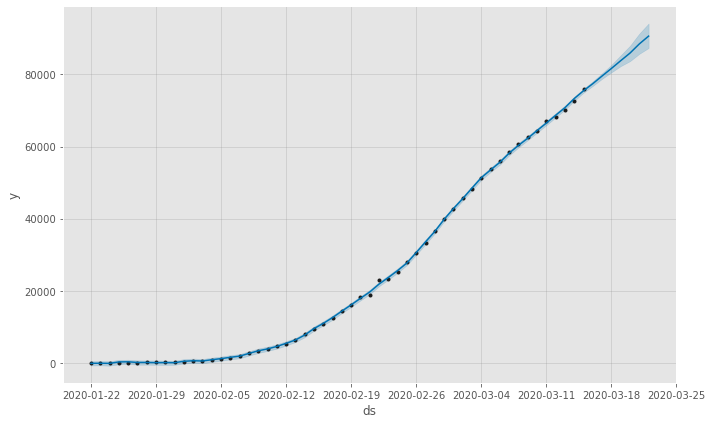

In [82]:
forecast_plot = m.plot(forecast)

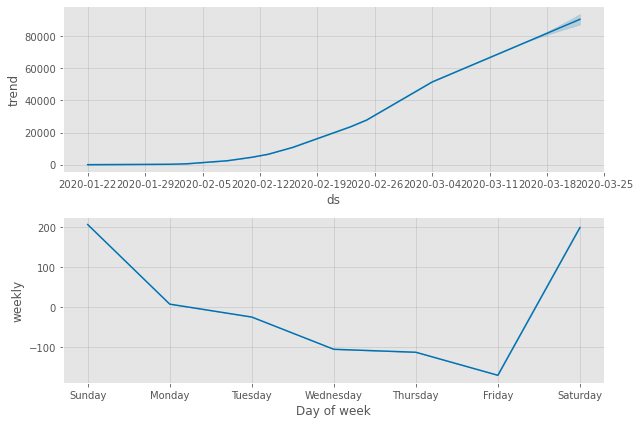

In [83]:
components_plot = m.plot_components(forecast)